In [1]:
# analytic solution
import sympy as sp
sp.init_printing()
# define symbols
v,u = sp.symbols(['v','u'])
Fp,rho,Cd,A,m = sp.symbols(['Fp','rho','Cd','A','m'])
# define equation
eqn = Fp*u/m - rho*A*Cd*v**2/(2*m)

print(sp.diff(eqn,v))
print(sp.diff(eqn,u))

-A*Cd*rho*v/m
Fp/m


In [2]:
# numberic solution
from scipy.misc import derivative
m = 700.0 # kg
Cd = 0.24  
rho = 1.225 # kg/m^3
A = 5.0   # m^2
Fp = 30.0  # N/%pedal
u = 40.0   # %pedal
v = 50.0   # km/hr (change this for SS condition)
def fv(v):
    return Fp*u/m - rho*A*Cd*v**2/(2*m)
def fu(u):
    return Fp*u/m - rho*A*Cd*v**2/(2*m)

print('Approximate Partial Derivatives')
print(derivative(fv,v))
print(derivative(fu,u))

print('Exact Partial Derivatives')
print(-A*Cd*rho*v/m)  # excat d(f(u,v))/dv
print(Fp/m)  # exact d(f(u,v))/du


Approximate Partial Derivatives
-0.105
0.0428571428571
Exact Partial Derivatives
-0.105
0.04285714285714286


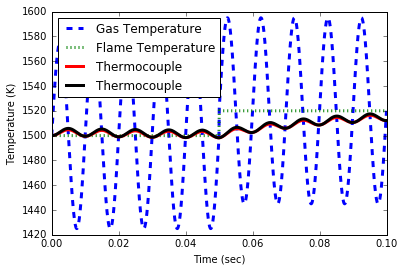

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
% matplotlib inline

# define thermocouple model
def thermocouple(x,t,Tg,Tf):
    ## States
    Tt = x[0]
    Tlin = x[1]
    
    ## parameters
    h = 2800.0    # W/m^2-K
    rho = 20.0    # gm/cm^3
    sigma = 5.67e-8 # W/m^2-K^4
    eps = 0.8       #
    Cp = 0.4        # J/gm-k
    d = 0.01        # cm
    r = d/2.0       # radius
    A = 4.0*np.pi*(r/100.0)**2 # sphere area (m^2)
    V = 4.0/3.0 * np.pi*r**3   # sphere volume (cm^3)
    
    # acc = inlet - outlet
    # acc = m*Cp*dT/dt = rho * V * Cp * dT/dt
    # acc = q(radiation) + q(convection)
    # q(radiation) = A * esp * sigma * (Tf^4 - Tt^4)
    # q(convection) = h * A * (Tg-Tt)
    q_conv = h*A*(Tg-Tt)
    q_rad = A*eps*sigma*(Tf**4-Tt**4)
    dTdt = (q_conv+q_rad)/(rho*V*Cp)
    dTlin_dt = (-4*eps*A*sigma*Tt**3-h*A)/(rho*V*Cp) # add linearized equation
    return [dTdt,dTlin_dt]

# Flame temperature
Tf0 = 1500.0 # K

# Starting thermocouple temperature
y0 = [Tf0,Tf0]

# Time intervals (sec)
t = np.linspace(0,0.1,1000)

# Flame temperature
Tf = np.ones(len(t))*Tf0
Tf[500:] = 1520.0

# Gas temperature cycles
Tg = Tf + (150.0/2.0)*np.sin(2.0*np.pi*100.0*t)

# Store thermocouple temperature fro plotting
Tt = np.ones(len(t))*Tf
Tlin = np.ones(len(t))*Tf

for i in range(len(t)-1):
    ts = [t[i],t[i+1]]
    y = odeint(thermocouple,y0,ts,args=(Tg[i],Tf[i]))
    y0 = y[-1]
    Tt[i+1] = y0[0]
    Tlin[i+1] = y0[1]
    
# plot the results
plt.figure()
plt.plot(t,Tg,'--',linewidth=3,label='Gas Temperature')
plt.plot(t,Tf,'g:',linewidth=3,label='Flame Temperature')
plt.plot(t,Tt,'r-',linewidth=3,label='Thermocouple')
plt.plot(t,Tlin,'k-',linewidth=3,label='Thermocouple')
plt.ylabel('Temperature (K)')
plt.legend(loc='best')
plt.xlim(0,t[-1])
plt.xlabel('Time (sec)')

plt.show()
